In [128]:
from matplotlib import pyplot as plt
from matplotlib import colors
from astropy.io import fits
from IPython.display import Image
import math
import numpy as np
from astropy.io import ascii
%matplotlib inline

from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#hello
#bye

# 4.1 Bias Frames
## 1 Opening and Plotting the Distribution counts

In [2]:
#Opening 0C bias frames 

hdu0= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000000.BIAS.FIT')
hdu1= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000001.BIAS.FIT')
hdu2= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000002.BIAS.FIT')
hdu3= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000003.BIAS.FIT')
hdu4= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000004.BIAS.FIT')
hdu5= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000005.BIAS.FIT')
hdu6= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000006.BIAS.FIT')
hdu7= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000007.BIAS.FIT')
hdu8= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000008.BIAS.FIT')
hdu9= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/bias_0C_visible_.00000009.BIAS.FIT')

In [3]:
header0 = hdu0[0].header
header1 = hdu1[0].header
header2 = hdu2[0].header
header3 = hdu3[0].header
header4 = hdu4[0].header
header5 = hdu5[0].header
header6 = hdu6[0].header
header7 = hdu7[0].header
header8 = hdu8[0].header
header9 = hdu9[0].header
header0

SIMPLE  =                    T/CCDSOFT-SOFTWARE BISQUE 3                        
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
BSCALE  = +1.000000000000E+000                                                  
BZERO   = +3.276800000000E+004                                                  
BIAS    =                  100                                                  
FOCALLEN= +0.000000000000E+000                                                  
APTAREA = +0.000000000000E+000                                                  
APTDIA  = +0.000000000000E+000                                                  
DATE-OBS= '2024-08-31T22:47:51.884'                                             
TIME-OBS= '22:47:51.884     

In [ ]:
bias_frames = []
for i in range(10):
    filename = f'bias_0C_visible_.0000000{i}.BIAS.FIT'
    bias = f'/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/bias_frames/0C/{filename}'
    bias_data = fits.getdata(bias)    bias_frames.append(bias_data)

In [4]:
#Grabbing the image data from files, creating an array of all the images, and averaging them out

i_data0 = hdu0[0].data
i_data1 = hdu1[0].data
i_data2 = hdu2[0].data
i_data3 = hdu3[0].data
i_data4 = hdu4[0].data
i_data5 = hdu5[0].data
i_data6 = hdu6[0].data
i_data7 = hdu7[0].data
i_data8 = hdu8[0].data
i_data9 = hdu9[0].data

allimage= [i_data0, i_data1, i_data2, i_data3, i_data4, i_data5, i_data6, i_data7, i_data8, i_data9]

avg= np.mean(allimage, axis=0)

In [5]:
#Turning the 2d array into 1d list

avgcountvalues= avg.flatten()

In [88]:
mean=np.mean(avg)
std=np.std(avg)

<function matplotlib.pyplot.show(close=None, block=None)>

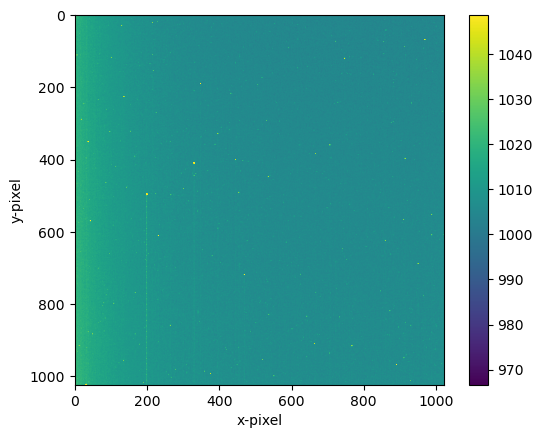

In [89]:
plt.imshow(avg, vmin=mean-3*std, vmax=mean+3*std)
plt.colorbar()
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show

Text(0.5, 0, 'Counts')

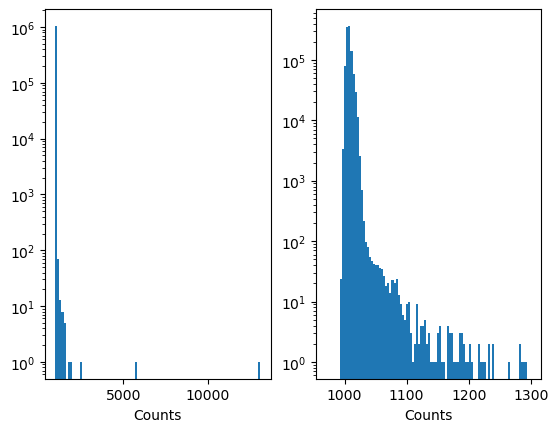

In [8]:
fig, (axes1, axes2)= plt.subplots(nrows=1, ncols=2)

axes1.hist(avgcountvalues, bins=100)
axes1.set_yscale('log')
axes1.set_xlabel('Counts')
axes2.hist(avgcountvalues, range=[970,1300], bins=100)
axes2.set_yscale('log')
plt.xlabel('Counts')

In [9]:
#Creating a cut

cutavgcount= avgcountvalues[avgcountvalues<1110]

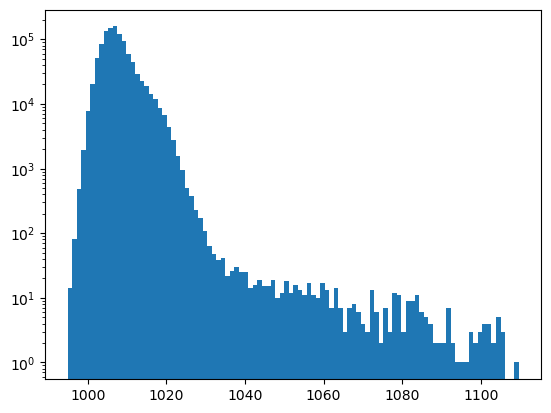

In [10]:
#histogram with the new set 

plt.hist(cutavgcount, bins=100)
plt.yscale('log')

In [11]:
#Mean, median, mode, and standard deviation of average count

print(np.mean(avgcountvalues))
print(stats.mode(avgcountvalues)[0][0])
print(np.median(avgcountvalues))
print(np.std(avgcountvalues))

1007.6364462852486
1006.5
1006.9
13.660944685337988


C:\Users\lenfn\AppData\Local\Temp\ipykernel_18784\1372687417.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(avgcountvalues)[0][0])


In [33]:
#Mean, median, mode, and standard deviation of cut average count

print(np.mean(cutavgcount))
print(stats.mode(cutavgcount)[0][0])
print(np.median(cutavgcount))
print(np.std(cutavgcount))

1007.5976102297732
1006.5
1006.9
4.1884752860684635


C:\Users\lenfn\AppData\Local\Temp\ipykernel_18784\2084519481.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(cutavgcount)[0][0])


In [13]:
print(len(avgcountvalues))
print(len(cutavgcount))

1048576
1048469


## 2. calculating and overplotting a normal distribution with the mean and standard deviation

C:\Users\lenfn\AppData\Local\Temp\ipykernel_18784\3454055761.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode=stats.mode(cutcounts)[0][0]


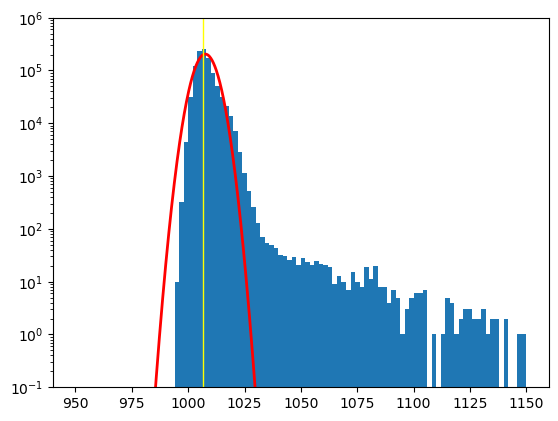

In [14]:
cmin=950
cmax=1150
nbins=100
normalization= (cmax-cmin)/nbins*len(avgcountvalues[(avgcountvalues>=cmin) & (avgcountvalues<=cmax)])

cutmin=cmin
cutmax=1075

cutcounts=avgcountvalues[(avgcountvalues>=cutmin) & (avgcountvalues<=cutmax)]

mu=np.mean(cutcounts)
sig=np.std(cutcounts)
mode=stats.mode(cutcounts)[0][0]

xarray=np.linspace(cmin, cmax, nbins*10)
yarray=normalization*norm.pdf(xarray, loc=mu, scale=sig)

plt.hist(avgcountvalues, range=[cmin, cmax], bins=nbins)
plt.yscale('log')
plt.ylim(0.1, 1e6)
plt.plot(xarray, yarray, color='red', linewidth=2.0)
plt.axvline(x=mode, linewidth=1.0, color='yellow')

In [219]:
dir(norm)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_changed',
 '_clip',
 '_scale',
 '_vmax',
 '_vmin',
 'autoscale',
 'autoscale_None',
 'callbacks',
 'clip',
 'inverse',
 'process_value',
 'scaled',
 'vmax',
 'vmin']

In [15]:
#Writing the combined average counts into a new fits file
#newhdu= fits.PrimaryHDU(avg)
#newhdu.writeto('avg_bias_frames.fits')

# 4.2 Dark Frames
## 4.2.1. Combining series of 10 dark frames.

In [16]:
dhdu0= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000000.DARK.FIT')
dhdu1= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000001.DARK.FIT')
dhdu2= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000002.DARK.FIT')
dhdu3= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000003.DARK.FIT')
dhdu4= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000004.DARK.FIT')
dhdu5= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000005.DARK.FIT')
dhdu6= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000006.DARK.FIT')
dhdu7= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000007.DARK.FIT')
dhdu8= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000008.DARK.FIT')
dhdu9= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_30s_visible_.00000009.DARK.FIT')


In [17]:
dheader0 = dhdu0[0].header
dheader0

SIMPLE  =                    T/CCDSOFT-SOFTWARE BISQUE 3                        
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
BSCALE  = +1.000000000000E+000                                                  
BZERO   = +3.276800000000E+004                                                  
BIAS    =                  100                                                  
FOCALLEN= +0.000000000000E+000                                                  
APTAREA = +0.000000000000E+000                                                  
APTDIA  = +0.000000000000E+000                                                  
DATE-OBS= '2024-08-31T22:54:42.380'                                             
TIME-OBS= '22:54:42.380     

In [18]:
df_data0 = dhdu0[0].data
df_data1 = dhdu1[0].data
df_data2 = dhdu2[0].data
df_data3 = dhdu3[0].data
df_data4 = dhdu4[0].data
df_data5 = dhdu5[0].data
df_data6 = dhdu6[0].data
df_data7 = dhdu7[0].data
df_data8 = dhdu8[0].data
df_data9 = dhdu9[0].data

alldf= [df_data0, df_data1, df_data2, df_data3, df_data4, df_data5, df_data6, df_data7, df_data8, df_data9]

masterdf= np.mean(alldf, axis=0)

In [19]:
meandf=np.mean(masterdf)
stddf=np.std(masterdf)

<function matplotlib.pyplot.show(close=None, block=None)>

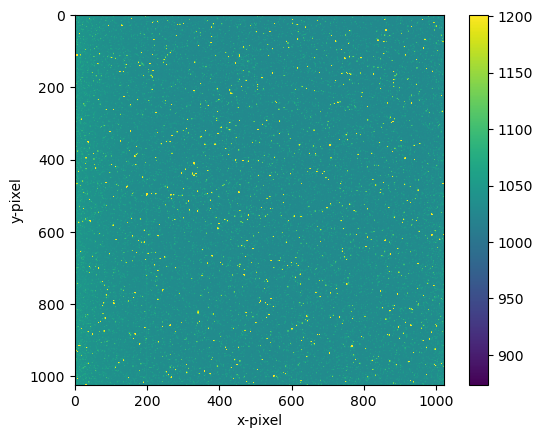

In [20]:
plt.imshow(masterdf, vmin=meandf-stddf, vmax=meandf+stddf)
plt.colorbar()
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show

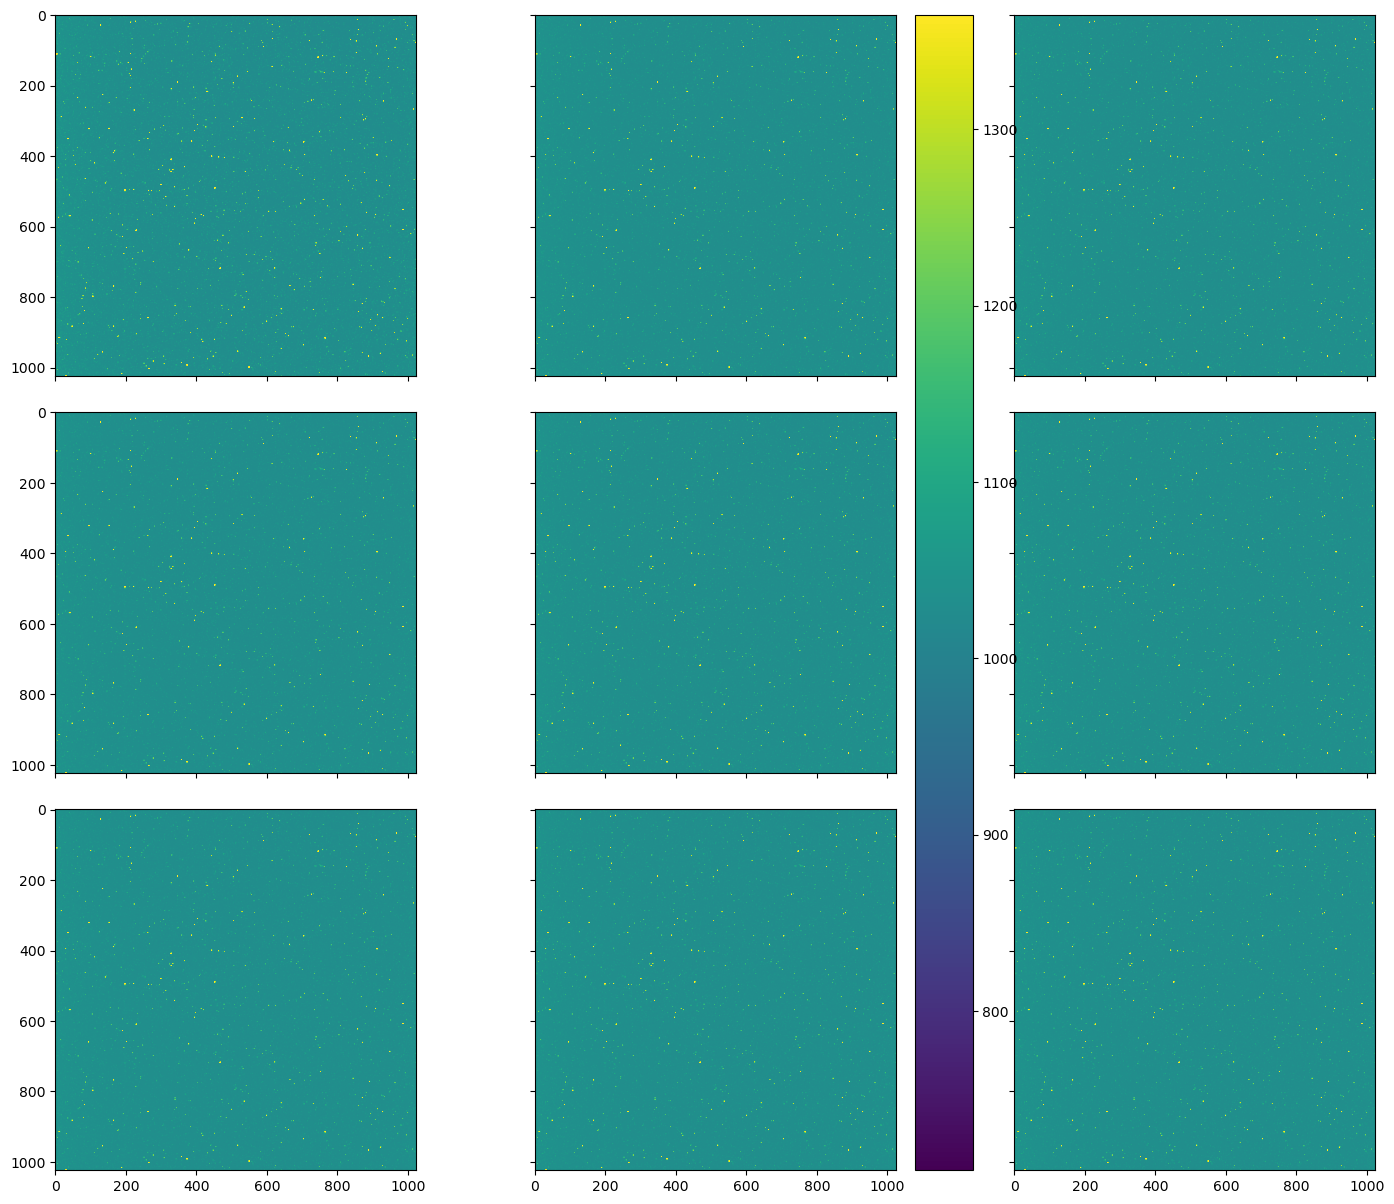

In [21]:
figs, axs= plt.subplots (3, 3, figsize=(18,15), sharex=True, sharey=True)


norm = colors.Normalize(vmin=meandf-2*stddf, vmax=meandf+2*stddf)

cb=axs[0, 0].imshow(df_data0,norm=norm)
#plt.colorbar(cb, ax=axs[0,0])
axs[0, 1].imshow(df_data1,vmin=meandf-3*stddf, vmax=meandf+3*stddf)
axs[0, 2].imshow(df_data2,vmin=meandf-3*stddf, vmax=meandf+3*stddf)
axs[1, 0].imshow(df_data3,vmin=meandf-3*stddf, vmax=meandf+3*stddf)
axs[1, 1].imshow(df_data4,vmin=meandf-3*stddf, vmax=meandf+3*stddf)
axs[1, 2].imshow(df_data5,vmin=meandf-3*stddf, vmax=meandf+3*stddf)
axs[2, 0].imshow(df_data6,vmin=meandf-3*stddf, vmax=meandf+3*stddf)
axs[2, 1].imshow(df_data7,vmin=meandf-3*stddf, vmax=meandf+3*stddf)
axs[2, 2].imshow(df_data8,vmin=meandf-3*stddf, vmax=meandf+3*stddf)

fig.colorbar(cb, ax=axs, orientation='vertical', fraction=.33)

figs.subplots_adjust(wspace=0.1, hspace=0.1)

In [382]:
cut_masterdf=masterdf
for i in range(len(masterdf)):
    for j in range(len(masterdf)):
        if masterdf[i,j]>7000:
            cut_masterdf[i,j]=np.median(masterdf)
            
cut_masterdf[cut_masterdf > 7000] = np.median(masterdf)

In [398]:
cut_meandf=np.mean(cut_masterdf[cut_masterdf <= 7000])
cut_stddf=np.std(cut_masterdf[cut_masterdf <= 7000])

<function matplotlib.pyplot.show(close=None, block=None)>

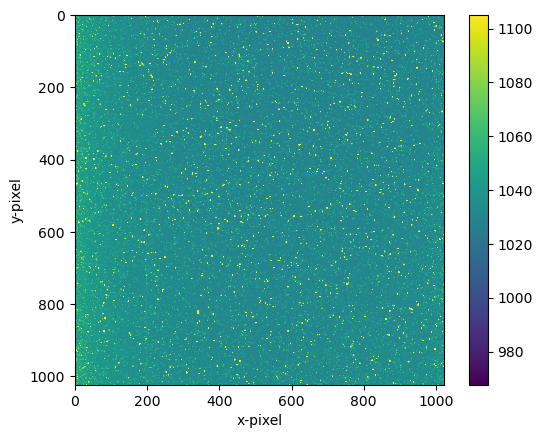

In [399]:
plt.imshow(cut_masterdf, vmin=cut_meandf-cut_stddf, vmax=cut_meandf+cut_stddf)
plt.colorbar()
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show

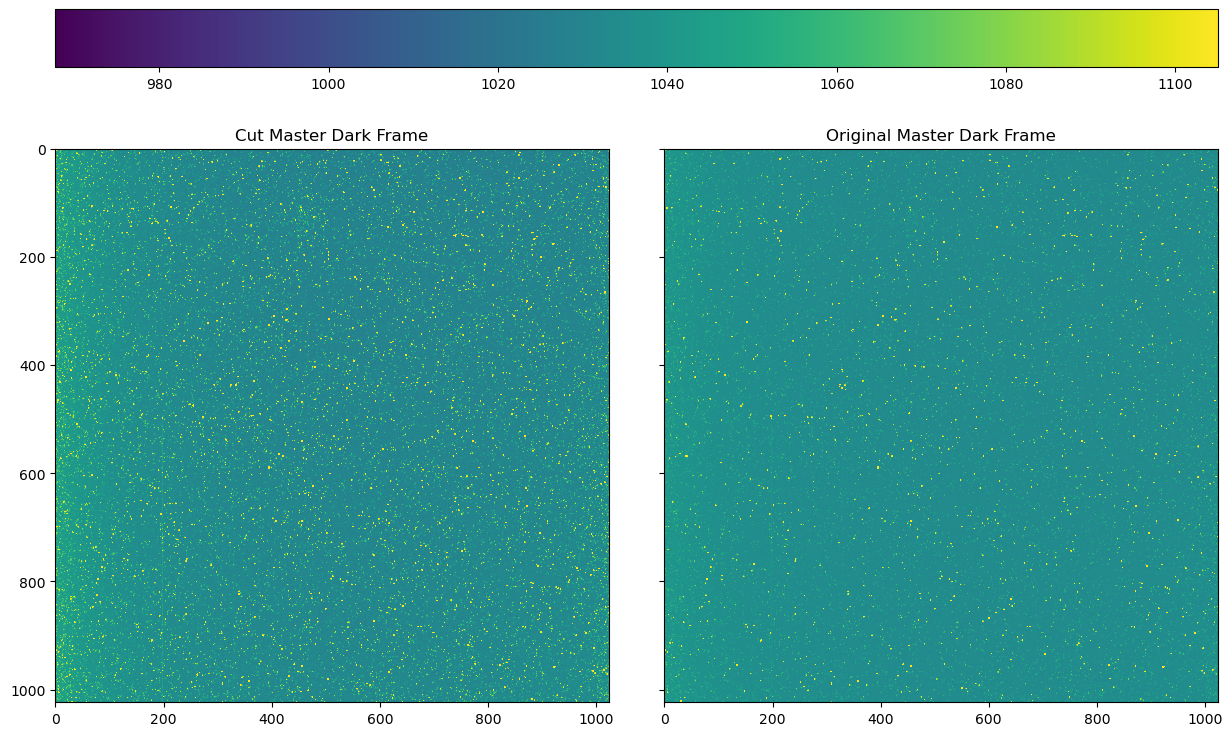

In [412]:
figs, axs= plt.subplots (1, 2, figsize=(15,12), sharex=True, sharey=True)


norm = colors.Normalize(vmin=cut_meandf-cut_stddf, vmax=cut_meandf+cut_stddf)

cb=axs[0].imshow(cut_masterdf,norm=norm)
axs[0].set_title('Cut Master Dark Frame')
#plt.colorbar(cb, ax=axs[0,0])
axs[1].imshow(masterdf,vmin=meandf-stddf, vmax=meandf+stddf)
axs[1].set_title('Original Master Dark Frame')

fig.colorbar(cb, ax=axs, orientation='horizontal', fraction=.75)

figs.subplots_adjust(wspace=0.1, hspace=0.1)

## Each frame is very similar looking but there are slight differences in their warmth. It could be from the fact that the temperature slightly fluctuated around 0C, so those slight temperature changes could have created very faint warmer or colder pixels.

## 4.2.2 Measuring the mean and the standard deviation of the cut dark frames.

In [43]:
d10hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_10s_visible_.00000000.DARK.FIT')
d20hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_20s_visible_.00000000.DARK.FIT')
d40hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_40s_visible_.00000000.DARK.FIT')
d50hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_50s_visible_.00000000.DARK.FIT')
d60hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_60s_visible_.00000000.DARK.FIT')
d90hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_90s_visible_.00000000.DARK.FIT')
d120hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_0C_120s_visible_.00000000.DARK.FIT')
d10c120hdu= fits.open('/Users/lenfn/Documents/AST 443/Group5_data_lab1/photometry/dark_frames/dark_10C_120s_visible_.00000000.DARK.FIT')


In [154]:
df10_data = d10hdu[0].data
df20_data = d20hdu[0].data
df40_data = d40hdu[0].data
df50_data = d50hdu[0].data
df60_data = d60hdu[0].data
df90_data = d90hdu[0].data
df120_data = d120hdu[0].data
df10c120_data = d10c120hdu[0].data


allsec_df= [df10_data, df20_data, df40_data, df50_data, df60_data, df90_data, df120_data, df10c120_data]

allsec_dfplot=[ df10_data, df20_data, df_data0, df40_data, df50_data, df60_data, df90_data, df120_data]


In [23]:
##Flattening the 10 dark frames at 30 second exposure

flat_df0=df_data0.flatten()
flat_df1=df_data1.flatten()
flat_df2=df_data2.flatten()
flat_df3=df_data3.flatten()
flat_df4=df_data4.flatten()
flat_df5=df_data5.flatten()
flat_df6=df_data6.flatten()
flat_df7=df_data7.flatten()
flat_df8=df_data8.flatten()
flat_df9=df_data9.flatten()

In [49]:
##Flattening the dark frames at different exposures

flat_df10=df10_data.flatten()
flat_df20=df20_data.flatten()
flat_df40=df40_data.flatten()
flat_df50=df50_data.flatten()
flat_df60=df60_data.flatten()
flat_df90=df90_data.flatten()
flat_df120=df120_data.flatten()
flat_df10c120=df10c120_data.flatten()

allsec_flatdf= [flat_df10, flat_df20, flat_df0, flat_df40, flat_df50, flat_df60, flat_df90, flat_df120, flat_df10c120]


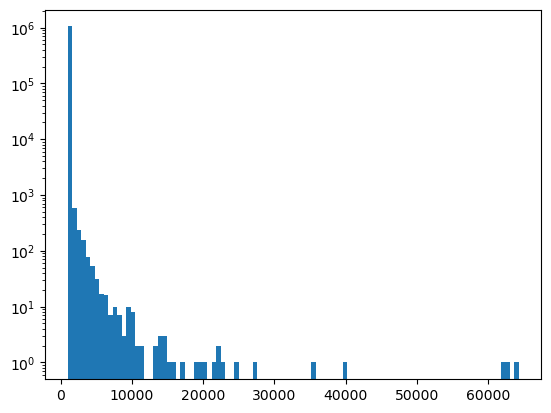

In [24]:
##Histogram of one dark frame at 30 second exposure

plt.hist(flat_df0, bins=100)
plt.yscale('log')

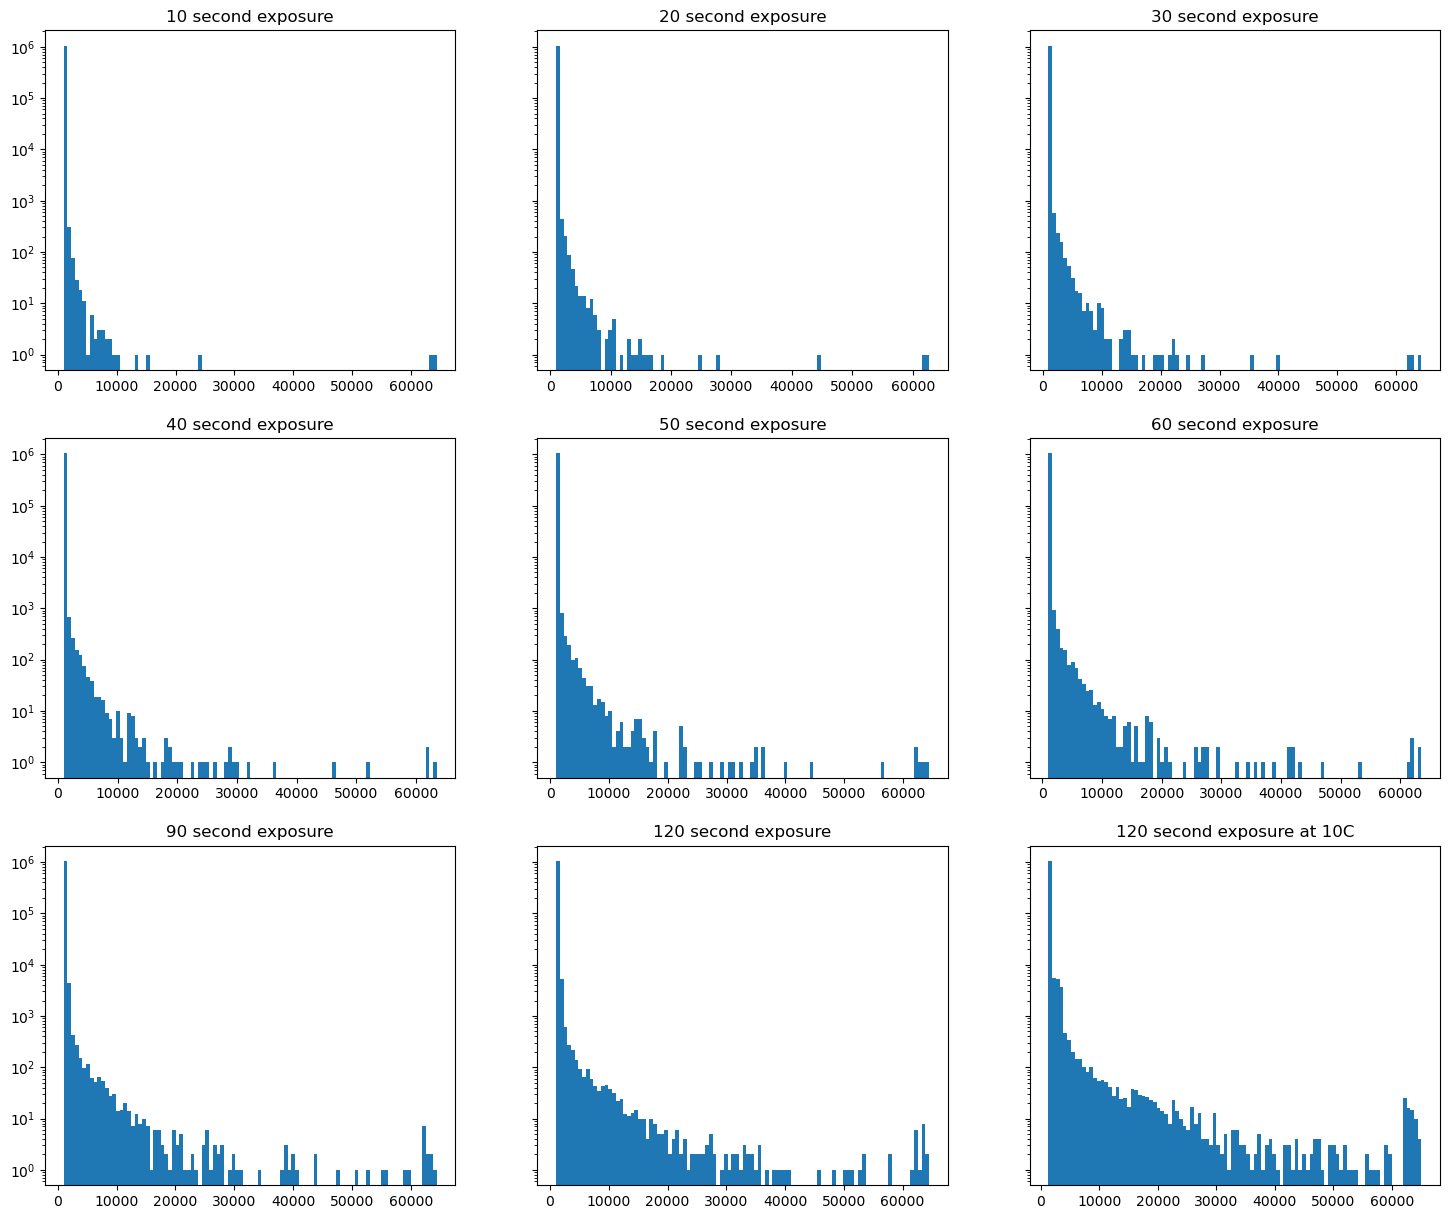

In [174]:
##Histogram of each dark frame at different exposures

n_bins=100
fig, axs = plt.subplots(3, 3, figsize=(18,15), sharey=True)

axs[0,0].hist(flat_df10, bins=n_bins)
axs[0,0].set_yscale('log')
axs[0,0].set_title('10 second exposure')
axs[0,1].hist(flat_df20, bins=n_bins)
axs[0,1].set_title('20 second exposure')
axs[0,2].hist(flat_df0, bins=n_bins)
axs[0,2].set_title('30 second exposure')
axs[1,0].hist(flat_df40, bins=n_bins)
axs[1,0].set_title('40 second exposure')
axs[1,1].hist(flat_df50, bins=n_bins)
axs[1,1].set_title('50 second exposure')
axs[1,2].hist(flat_df60, bins=n_bins)
axs[1,2].set_title('60 second exposure')
axs[2,0].hist(flat_df90, bins=n_bins)
axs[2,0].set_title('90 second exposure')
axs[2,1].hist(flat_df120, bins=n_bins)
axs[2,1].set_title('120 second exposure')
axs[2,2].hist(flat_df10c120, bins=n_bins)
axs[2,2].set_title('120 second exposure at 10C')
plt.show()

In [50]:
#Making a cut on all dark frames

cut_df0=flat_df0[flat_df0<7000]
cut_df10=flat_df10[flat_df10<7000]
cut_df20=flat_df20[flat_df20<7000]
cut_df40=flat_df40[flat_df40<7000]
cut_df50=flat_df50[flat_df50<7000]
cut_df60=flat_df60[flat_df60<7000]
cut_df90=flat_df90[flat_df90<7000]
cut_df120=flat_df120[flat_df120<7000]
cut_df10c120=flat_df10c120[flat_df10c120<7000]


cut2_df0=flat_df0[flat_df0<2000]
cut2_df10=flat_df10[flat_df10<2000]
cut2_df20=flat_df20[flat_df20<2000]
cut2_df40=flat_df40[flat_df40<2000]
cut2_df50=flat_df50[flat_df50<2000]
cut2_df60=flat_df60[flat_df60<2000]
cut2_df90=flat_df90[flat_df90<2000]
cut2_df120=flat_df120[flat_df120<2000]
cut2_df10c120=flat_df10c120[flat_df10c120<2000]

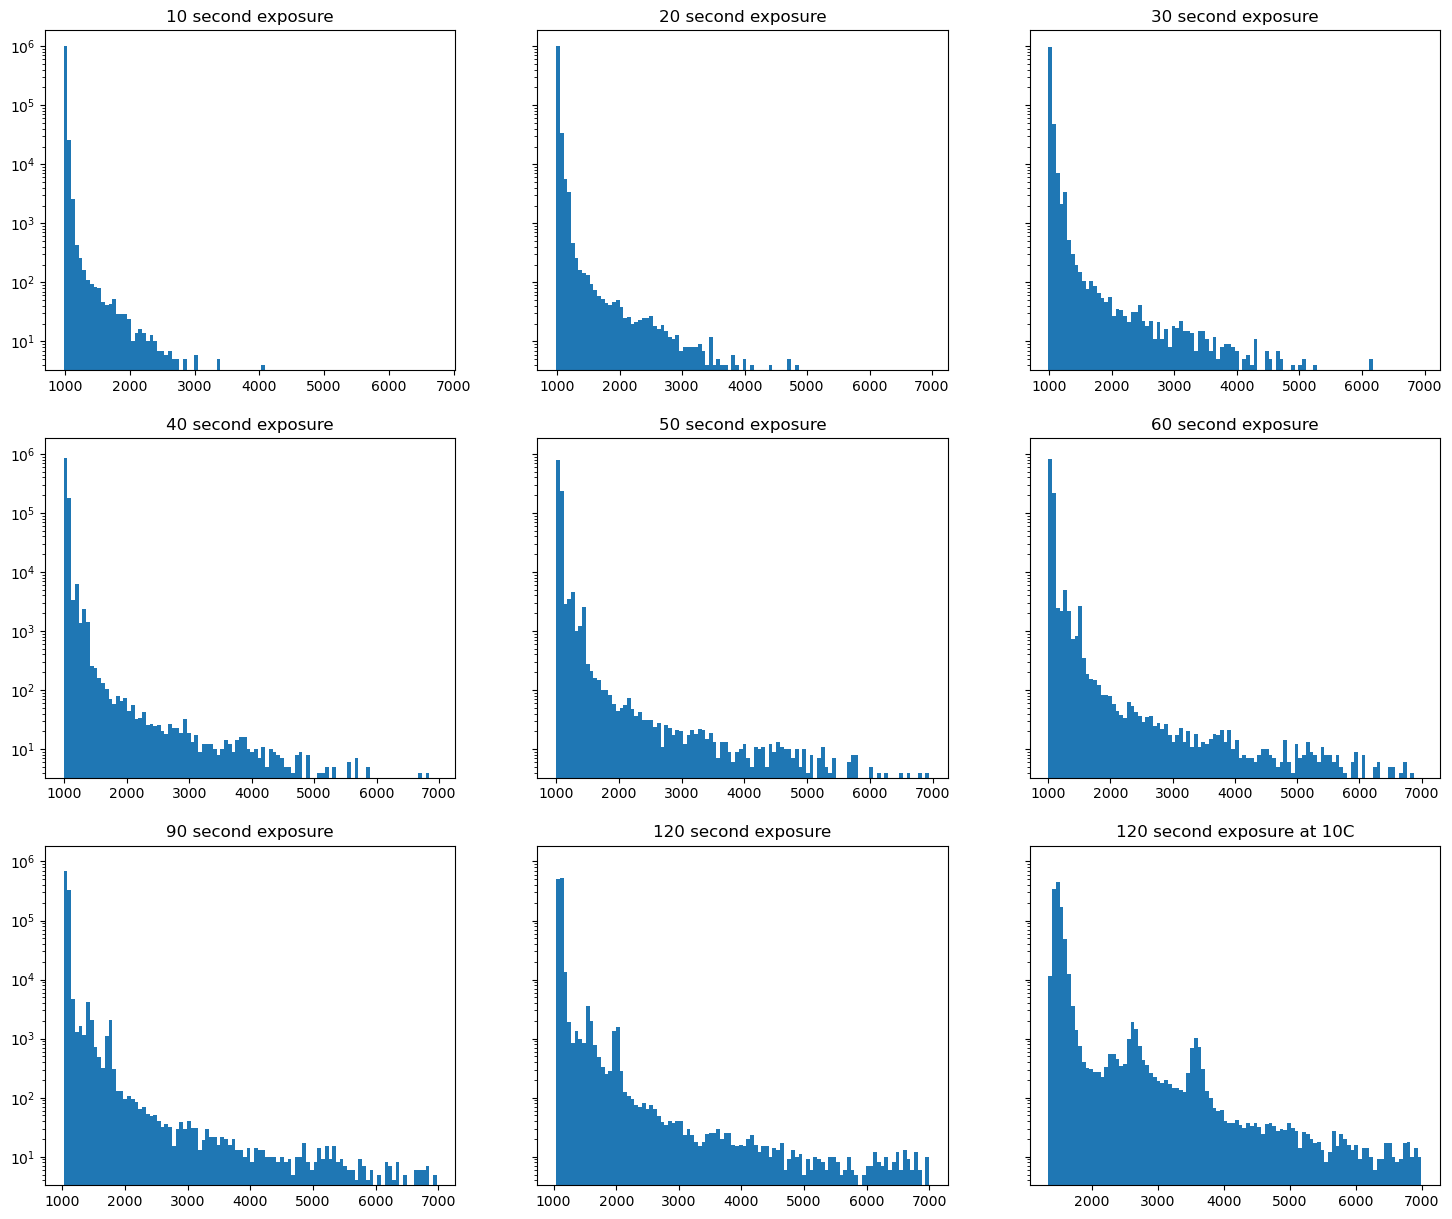

In [175]:
fig, axs = plt.subplots(3, 3, figsize=(18,15), sharey=True)

axs[0,0].hist(cut_df10, bins=n_bins)
axs[0,0].set_yscale('log')
axs[0,0].set_title('10 second exposure')
axs[0,1].hist(cut_df20, bins=n_bins)
axs[0,1].set_title('20 second exposure')
axs[0,2].hist(cut_df0, bins=n_bins)
axs[0,2].set_title('30 second exposure')
axs[1,0].hist(cut_df40, bins=n_bins)
axs[1,0].set_title('40 second exposure')
axs[1,1].hist(cut_df50, bins=n_bins)
axs[1,1].set_title('50 second exposure')
axs[1,2].hist(cut_df60, bins=n_bins)
axs[1,2].set_title('60 second exposure')
axs[2,0].hist(cut_df90, bins=n_bins)
axs[2,0].set_title('90 second exposure')
axs[2,1].hist(cut_df120, bins=n_bins)
axs[2,1].set_title('120 second exposure')
axs[2,2].hist(cut_df10c120, bins=n_bins)
axs[2,2].set_title('120 second exposure at 10C')
plt.show()

In [141]:
allsec_cutdf=[cut_df0,cut_df10, cut_df20, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120,cut_df10c120]
err_allsec_cutdf=[cut_df10, cut_df20,cut_df0, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120]
allsec_cutdfplot=[cut_df10, cut_df20,cut_df0, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120]
allsec_cut2df=[cut2_df0,cut2_df10, cut2_df20, cut2_df40,cut2_df50, cut2_df60, cut2_df90, cut2_df120,cut2_df10c120]

In [53]:
for i in range(len(allsec_cutdf)):
    print(np.mean(allsec_cutdf[i]))
    print(np.std(allsec_cutdf[i]))
    print(np.median(allsec_cutdf[i]))

1036.595094171909
69.22126277800366
1032.0
1017.4389015040613
35.290090161963455
1016.0
1027.3133362834728
54.73075466822694
1024.0
1045.2678684177897
81.43349910452515
1040.0
1054.2589159930371
91.5548888765621
1047.0
1062.8398320839465
100.21502175670778
1055.0
1088.1724857730267
114.61999998408436
1077.0
1114.0914568520363
132.139559933828
1100.0
1499.4338816461607
217.49680672903844
1467.0


## a

In [108]:
allsec_cutdfmean=[]
for i in range(len(allsec_cutdfplot)):
    allsec_cutdfmean.append(np.mean(allsec_cutdfplot[i]))
    print(allsec_cutdfmean)


[1017.4389015040613]
[1017.4389015040613, 1027.3133362834728]
[1017.4389015040613, 1027.3133362834728, 1036.595094171909]
[1017.4389015040613, 1027.3133362834728, 1036.595094171909, 1045.2678684177897]
[1017.4389015040613, 1027.3133362834728, 1036.595094171909, 1045.2678684177897, 1054.2589159930371]
[1017.4389015040613, 1027.3133362834728, 1036.595094171909, 1045.2678684177897, 1054.2589159930371, 1062.8398320839465]
[1017.4389015040613, 1027.3133362834728, 1036.595094171909, 1045.2678684177897, 1054.2589159930371, 1062.8398320839465, 1088.1724857730267]
[1017.4389015040613, 1027.3133362834728, 1036.595094171909, 1045.2678684177897, 1054.2589159930371, 1062.8398320839465, 1088.1724857730267, 1114.0914568520363]


In [155]:
allsec_dfmean=[]
for i in range(len(allsec_dfplot)):
    allsec_dfmean.append(np.mean(allsec_dfplot[i]))
    print(allsec_dfmean)

[1017.6758079528809]
[1017.6758079528809, 1027.825325012207]
[1017.6758079528809, 1027.825325012207, 1037.4939994812012]
[1017.6758079528809, 1027.825325012207, 1037.4939994812012, 1046.6850862503052]
[1017.6758079528809, 1027.825325012207, 1037.4939994812012, 1046.6850862503052, 1056.301329612732]
[1017.6758079528809, 1027.825325012207, 1037.4939994812012, 1046.6850862503052, 1056.301329612732, 1065.4647874832153]
[1017.6758079528809, 1027.825325012207, 1037.4939994812012, 1046.6850862503052, 1056.301329612732, 1065.4647874832153, 1093.3097648620605]
[1017.6758079528809, 1027.825325012207, 1037.4939994812012, 1046.6850862503052, 1056.301329612732, 1065.4647874832153, 1093.3097648620605, 1121.2204303741455]


In [149]:
y_err=[]
for i in range(len(err_allsec_cutdf)):
    y_err.append(np.std(err_allsec_cutdf[i]))
    print(np.std(err_allsec_cutdf[i]))
    print(y_err)

35.290090161963455
[35.290090161963455]
54.73075466822694
[35.290090161963455, 54.73075466822694]
69.22126277800366
[35.290090161963455, 54.73075466822694, 69.22126277800366]
81.43349910452515
[35.290090161963455, 54.73075466822694, 69.22126277800366, 81.43349910452515]
91.5548888765621
[35.290090161963455, 54.73075466822694, 69.22126277800366, 81.43349910452515, 91.5548888765621]
100.21502175670778
[35.290090161963455, 54.73075466822694, 69.22126277800366, 81.43349910452515, 91.5548888765621, 100.21502175670778]
114.61999998408436
[35.290090161963455, 54.73075466822694, 69.22126277800366, 81.43349910452515, 91.5548888765621, 100.21502175670778, 114.61999998408436]
132.139559933828
[35.290090161963455, 54.73075466822694, 69.22126277800366, 81.43349910452515, 91.5548888765621, 100.21502175670778, 114.61999998408436, 132.139559933828]


In [147]:
y2_err=[]
for i in range(len(err_allsec_cutdf)):
    y2_err.append(np.sqrt(np.mean(err_allsec_cutdf[i]))/np.sqrt(len(err_allsec_cutdf[i])))
    print(np.std(err_allsec_cutdf[i]))
    print(y2_err)

35.290090161963455
[0.031149947502442578]
54.73075466822694
[0.031149947502442578, 0.0313010838433955]
69.22126277800366
[0.031149947502442578, 0.0313010838433955, 0.03144261806639071]
81.43349910452515
[0.031149947502442578, 0.0313010838433955, 0.03144261806639071, 0.03157445012371524]
91.5548888765621
[0.031149947502442578, 0.0313010838433955, 0.03144261806639071, 0.03157445012371524, 0.03171063634106531]
100.21502175670778
[0.031149947502442578, 0.0313010838433955, 0.03144261806639071, 0.03157445012371524, 0.03171063634106531, 0.031840093931641146]
114.61999998408436
[0.031149947502442578, 0.0313010838433955, 0.03144261806639071, 0.03157445012371524, 0.03171063634106531, 0.031840093931641146, 0.03222032376483453]
132.139559933828
[0.031149947502442578, 0.0313010838433955, 0.03144261806639071, 0.03157445012371524, 0.03171063634106531, 0.031840093931641146, 0.03222032376483453, 0.032603610141234814]


In [56]:

for i in range(len(all_cutdf)):
    print(np.sqrt(np.mean(all_cutdf[i]))/np.sqrt(len(all_cutdf[i])))
    

0.03144261806639071
0.03144173812518555
0.03144008885434596
0.031434631484646085
0.03143365919658709
0.031438649719960576
0.0314387597087723
0.03143664167296306
0.03143892914401471
0.03144304696176282


In [60]:

for i in range(len(allsec_flatdf)):
    print(np.sqrt(np.mean(allsec_flatdf[i]))/np.sqrt(len(allsec_flatdf[i])))

0.03115335103119152
0.031308315416452036
0.03145522819390794
0.031594250808056466
0.03173905241870707
0.03187642393459445
0.03229026854371304
0.03269983375306035
0.0380718581360009


## b

In [55]:
for i in range(len(allsec_cutdf)):
    print(np.sqrt(np.mean(allsec_cutdf[i]))/np.sqrt(len(allsec_cutdf[i])))

0.031431027577900054
0.031147368111955075
0.031294090615724066
0.03155883652693578
0.031691480813060585
0.03181795206740275
0.03219490547969907
0.03257722509250355
0.03782959607651715


In [58]:
for i in range(len(allsec_cut2df)):
    print(np.sqrt(np.mean(allsec_cut2df[i]))/np.sqrt(len(allsec_cut2df[i])))

0.031431027577900054
0.031147368111955075
0.031294090615724066
0.03155883652693578
0.031691480813060585
0.03181795206740275
0.03219490547969907
0.03257722509250355
0.03782959607651715


In [95]:
time_array=[10,20,30,40,50,60,90,120]

In [104]:
allsec_cutdf[3]

array([1062, 1057, 1072, ..., 1055, 1033, 1038], dtype=uint16)

In [62]:
np.mean(df10_data)

1017.6758079528809

In [150]:
y_err

[35.290090161963455,
 54.73075466822694,
 69.22126277800366,
 81.43349910452515,
 91.5548888765621,
 100.21502175670778,
 114.61999998408436,
 132.139559933828]

In [170]:
m, b = np.polyfit(time_array, allsec_cutdfmean, deg=1)
n, c = np.polyfit(time_array, allsec_dfmean, deg=1)
regression=[]
residual=[]
for i in range(len(time_array)):
    regression.append(0.9*time_array[i]+1010)
    residual.append(allsec_cutdfmean[0]-regression)
residual

[array([-1.5610985]),
 array([ -1.5610985, -10.5610985]),
 array([ -1.5610985, -10.5610985, -19.5610985]),
 array([ -1.5610985, -10.5610985, -19.5610985, -28.5610985]),
 array([ -1.5610985, -10.5610985, -19.5610985, -28.5610985, -37.5610985]),
 array([ -1.5610985, -10.5610985, -19.5610985, -28.5610985, -37.5610985,
        -46.5610985]),
 array([ -1.5610985, -10.5610985, -19.5610985, -28.5610985, -37.5610985,
        -46.5610985, -73.5610985]),
 array([  -1.5610985,  -10.5610985,  -19.5610985,  -28.5610985,
         -37.5610985,  -46.5610985,  -73.5610985, -100.5610985])]

(-1.0, 130.0)

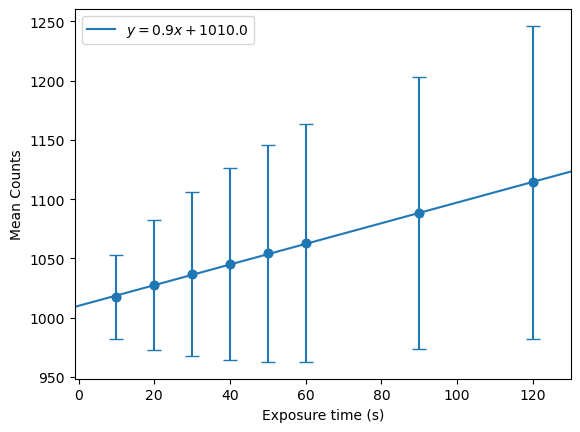

In [145]:
plt.scatter(time_array, allsec_cutdfmean)
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')
plt.errorbar(time_array, allsec_cutdfmean, yerr=y_err, fmt='o', capsize=5)
plt.xlabel('Exposure time (s)')
plt.ylabel('Mean Counts')
plt.legend(loc="best")
plt.xlim(-1,130)

(-1.0, 130.0)

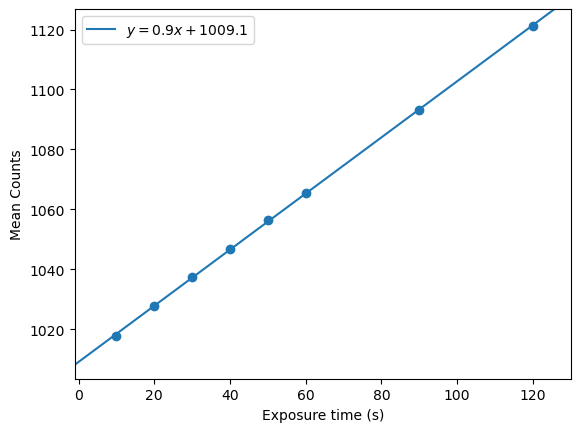

In [160]:
plt.scatter(time_array, allsec_dfmean)
plt.axline(xy1=(0, c), slope=n, label=f'$y = {n:.1f}x {c:+.1f}$')
#plt.errorbar(time_array, allsec_cutdfmean, yerr=y2_err, fmt='o', capsize=5)
plt.xlabel('Exposure time (s)')
plt.ylabel('Mean Counts')
plt.legend(loc="best")
plt.xlim(-1,130)

In [413]:
masterdf[67,968]

27474.8

In [388]:
cut_masterdf[67,968]

1031.2

In [397]:
print(np.max(masterdf))
print(np.max(cut_masterdf))
print(np.std(masterdf))
print(np.std(cut_masterdf))

64363.9
6901.8
163.69151420104293
68.64242302673792
